In [1]:
import cupy as np
import cudf as pd
import matplotlib.pyplot as plt
import pickle 
import os
import numpy

In [2]:
cascs79 = sorted(os.listdir('/home/braedyn/Documents/causalCascades/7-9/'))
cascs24 = sorted(os.listdir('/home/braedyn/Documents/causalCascades/2-4/'))
stockPoolNPC = np.load("./results/nopricechange/2-4/stockPool_501_5000_100_2_5.npy")

In [3]:
p = 'npc_200_7200_100_5_10.pkl'

with open('/home/braedyn/Documents/causalCascades/7-9/causalCascades11_' + p, 'rb') as handle:
    cc11 = pickle.load(handle)

with open('/home/braedyn/Documents/causalCascades/7-9/causalCascades12_' + p, 'rb') as handle:
    cc12 = pickle.load(handle)
    
with open('/home/braedyn/Documents/causalCascades/7-9/causalCascades21_' + p, 'rb') as handle:
    cc21 = pickle.load(handle)
    
with open('/home/braedyn/Documents/causalCascades/7-9/causalCascades22_' + p, 'rb') as handle:
    cc22 = pickle.load(handle)

In [4]:
def cascadeAnalyzerGPU(cascades, stockPool, t0 , tf):
    """
    returns arrays of general cascade sizes (value), nrows, and duration for histogramming
    CALL FINDCASCADES FIRST FOR CAUSAL CASCADES
    """
    sizes = np.array([])
    nrows = np.array([])
    duration = np.array([])
    numCascade = len(cascades)
    for i in range(numCascade):
        casc = cascades[i]
        if casc['time'].min() > t0 and casc['time'].max() < tf:
            size = 0
            for row in range(len(casc)):
                time = (casc['time'].iloc[row])
                stock = (casc['stock'].iloc[row])
                volume = (casc['order'].iloc[row])
                size += stockPool[stock][time]*abs(volume)
            dur = casc['time'].max()-casc['time'].min()
            if dur == 0:
                dur = 1
            duration = np.concatenate((duration, np.array([int(dur)])))
            sizes = np.concatenate((sizes, np.array([int(size)])))
            nrows = np.concatenate((nrows, np.array([int(len(casc))])))
        # else:
            # print('passed cascade '+ str(i) + ' of size ' + str(len(cascades[i])))
            
    return sizes, nrows, duration

In [5]:
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(cc22, stockPoolNPC, t0=993, tf=5992)
npcsizes21, npcnrows21, npcduration21 = cascadeAnalyzerGPU(cc21, stockPoolNPC, t0=993, tf=5992)
npcsizes12, npcnrows12, npcduration12 = cascadeAnalyzerGPU(cc12, stockPoolNPC, t0=993, tf=5992)
npcsizes11, npcnrows11, npcduration11 = cascadeAnalyzerGPU(cc11, stockPoolNPC, t0=993, tf=5992)

# NTrans

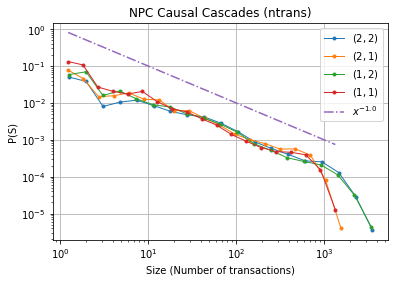

In [20]:
tau = 1.0

hist, bins = np.histogram(npcnrows22, bins=np.logspace(np.log10(min(npcnrows22)),np.log10(max(npcnrows22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcnrows22),'o-', linewidth = 1, markersize = 3, label = "$(2,2)$")

hist, bins = np.histogram(npcnrows21, bins=np.logspace(np.log10(min(npcnrows21)),np.log10(max(npcnrows21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcnrows21),'o-', linewidth = 1, markersize = 3, label = "$(2,1)$")

hist, bins = np.histogram(npcnrows12, bins=np.logspace(np.log10(min(npcnrows12)),np.log10(max(npcnrows12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcnrows12),'o-', linewidth = 1, markersize = 3, label = "$(1,2)$")

hist, bins = np.histogram(npcnrows11, bins=np.logspace(np.log10(min(npcnrows11)),np.log10(max(npcnrows11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcnrows11),'o-', linewidth = 1, markersize = 3, label = "$(1,1)$")

plt.plot(mid,numpy.power(mid,-1*tau)*1, '-.', label= "$x^{-"+str(tau)+"}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans)")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./forsiewann/march11/ntrans_"+p[:-4]+".png", dpi=250)
plt.show()
plt.close()



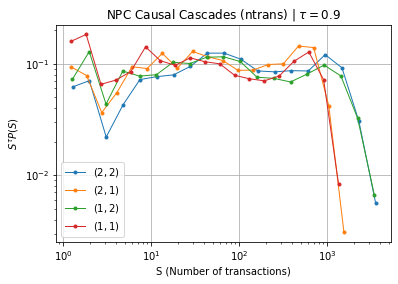

In [21]:
tau = 0.9

hist, bins = np.histogram(npcnrows22, bins=np.logspace(np.log10(min(npcnrows22)),np.log10(max(npcnrows22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcnrows22)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$(2,2)$")

hist, bins = np.histogram(npcnrows21, bins=np.logspace(np.log10(min(npcnrows21)),np.log10(max(npcnrows21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcnrows21)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$(2,1)$")

hist, bins = np.histogram(npcnrows12, bins=np.logspace(np.log10(min(npcnrows12)),np.log10(max(npcnrows12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcnrows12)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$(1,2)$")

hist, bins = np.histogram(npcnrows11, bins=np.logspace(np.log10(min(npcnrows11)),np.log10(max(npcnrows11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcnrows11)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$(1,1)$")

# plt.plot(mid[a],numpy.power(mid[a],-1*tau)*numpy.power(mid[a],tau), '-.', label= "$x^{-"+str(tau)+"}$")
plt.loglog()
plt.legend()
plt.title(r"NPC Causal Cascades (ntrans) | $ \tau = $"+str(tau))
plt.ylabel(r'$S^{\tau}P(S)$')
plt.xlabel('S (Number of transactions)')
plt.grid(True)
plt.savefig("./forsiewann/march11/ntrans_scaled_"+p[:-4]+".png", dpi=250)
plt.show()
plt.close()



# Volume

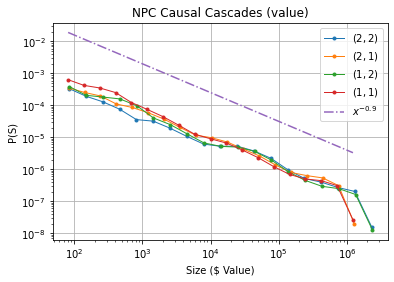

In [22]:
tau =0.9

hist, bins = np.histogram(npcsizes22, bins=np.logspace(np.log10(min(npcsizes22)),np.log10(max(npcsizes22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcsizes22),'o-', linewidth = 1, markersize = 3, label = "$(2,2)$")

hist, bins = np.histogram(npcsizes21, bins=np.logspace(np.log10(min(npcsizes21)),np.log10(max(npcsizes21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcsizes21),'o-', linewidth = 1, markersize = 3, label = "$(2,1)$")

hist, bins = np.histogram(npcsizes12, bins=np.logspace(np.log10(min(npcsizes12)),np.log10(max(npcsizes12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
         
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcsizes12),'o-', linewidth = 1, markersize = 3, label = "$(1,2)$")

hist, bins = np.histogram(npcsizes11, bins=np.logspace(np.log10(min(npcsizes11)),np.log10(max(npcsizes11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
         
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcsizes11),'o-', linewidth = 1, markersize = 3, label = "$(1,1)$")

plt.plot(mid,numpy.power(mid,-1*tau)*1, '-.', label= "$x^{-"+str(tau)+"}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (value)")
plt.ylabel('P(S)')
plt.xlabel('Size ($ Value)')
plt.grid(True)
plt.savefig("./forsiewann/march11/value_"+p[:-4]+".png", dpi=250)
plt.show()
plt.close()



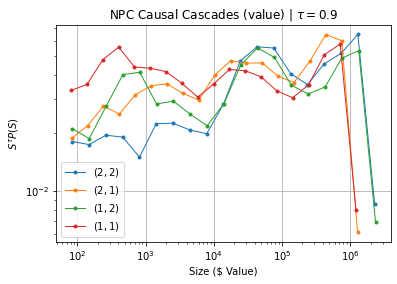

In [23]:
tau =0.9

hist, bins = np.histogram(npcsizes22, bins=np.logspace(np.log10(min(npcsizes22)),np.log10(max(npcsizes22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcsizes22)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$(2,2)$")

hist, bins = np.histogram(npcsizes21, bins=np.logspace(np.log10(min(npcsizes21)),np.log10(max(npcsizes21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcsizes21)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$(2,1)$")

hist, bins = np.histogram(npcsizes12, bins=np.logspace(np.log10(min(npcsizes12)),np.log10(max(npcsizes12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
         
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcsizes12)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$(1,2)$")

hist, bins = np.histogram(npcsizes11, bins=np.logspace(np.log10(min(npcsizes11)),np.log10(max(npcsizes11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
         
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcsizes11)* numpy.power(mid[a],tau),'o-', linewidth = 1, markersize = 3, label = "$(1,1)$")

# plt.plot(mid,numpy.power(mid,-1*tau)*1, '-.', label= "$x^{-"+str(tau)+"}$")
plt.loglog()
plt.legend()
plt.title(r"NPC Causal Cascades (value) | $ \tau = $"+str(tau))
plt.ylabel(r'$S^{\tau}P(S)$')
plt.xlabel('Size ($ Value)')
plt.grid(True)
plt.savefig("./forsiewann/march11/value_scaled_"+p[:-4]+".png", dpi=250)
plt.show()
plt.close()



# Duration

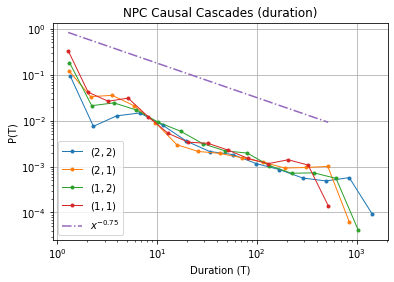

In [24]:
taut = 0.75

hist, bins = np.histogram(npcduration22, bins=np.logspace(np.log10(min(npcduration22)),np.log10(max(npcduration22)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcduration22),'o-', linewidth = 1, markersize = 3, label = "$(2,2)$")

hist, bins = np.histogram(npcduration21, bins=np.logspace(np.log10(min(npcduration21)),np.log10(max(npcduration21)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcduration21),'o-', linewidth = 1, markersize = 3, label = "$(2,1)$")

hist, bins = np.histogram(npcduration12, bins=np.logspace(np.log10(min(npcduration12)),np.log10(max(npcduration12)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcduration12),'o-', linewidth = 1, markersize = 3, label = "$(1,2)$")

hist, bins = np.histogram(npcduration11, bins=np.logspace(np.log10(min(npcduration11)),np.log10(max(npcduration11)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcduration11),'o-', linewidth = 1, markersize = 3, label = "$(1,1)$")

plt.plot(mid,numpy.power(mid,-1*taut), '-.', label= "$x^{-"+str(taut)+"}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration)")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./forsiewann/march11/duration_"+p[:-4]+".png", dpi=250)
plt.show()
plt.close()

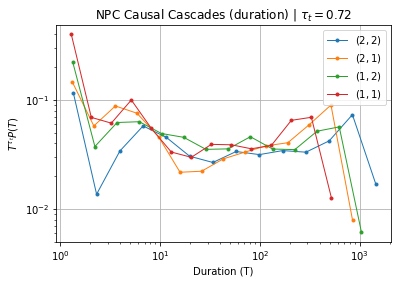

In [25]:
taut = 0.72

hist, bins = np.histogram(npcduration22, bins=np.logspace(np.log10(min(npcduration22)),np.log10(max(npcduration22)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcduration22)* numpy.power(mid[a],taut),'o-', linewidth = 1, markersize = 3, label = "$(2,2)$")

hist, bins = np.histogram(npcduration21, bins=np.logspace(np.log10(min(npcduration21)),np.log10(max(npcduration21)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcduration21)* numpy.power(mid[a],taut),'o-', linewidth = 1, markersize = 3, label = "$(2,1)$")

hist, bins = np.histogram(npcduration12, bins=np.logspace(np.log10(min(npcduration12)),np.log10(max(npcduration12)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcduration12)* numpy.power(mid[a],taut),'o-', linewidth = 1, markersize = 3, label = "$(1,2)$")

hist, bins = np.histogram(npcduration11, bins=np.logspace(np.log10(min(npcduration11)),np.log10(max(npcduration11)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
a = numpy.nonzero(hist)[0]
plt.plot(mid[a],numpy.divide(hist[a],binsize[a])/len(npcduration11)* numpy.power(mid[a],taut),'o-', linewidth = 1, markersize = 3, label = "$(1,1)$")

# plt.plot(mid,numpy.power(mid,-1*taut), '-.', label= "$x^{-"+str(taut)+"}$")
plt.loglog()
plt.legend()
plt.title(r"NPC Causal Cascades (duration) | $\tau_t = $"+str(taut))
plt.ylabel(r'$T^{\tau_t}P(T)$')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./forsiewann/march11/duration_scaled_"+p[:-4]+".png", dpi=250)
plt.show()
plt.close()